In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from imblearn.under_sampling import RandomUnderSampler

from surprise.model_selection import GridSearchCV,RandomizedSearchCV


In [2]:
#reading ratings.dat to dataframe
ratings=pd.read_csv(r'D:\Sem-2\Recommenders\Programming\ml-1m\ratings.dat',sep=r"::",engine='python',header=None)
#renaming ratings columns
ratings.columns=['UserID','MovieID','Rating','Timestamp']

ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
#conversion of timestamp to datetime
ratings['dat']=ratings['Timestamp'].apply(datetime.fromtimestamp)


In [7]:
#conversion of  datetime to year
ratings['x']=ratings.dat.dt.year
ratings

,UserID,MovieID,Rating,Timestamp,dat,x
0,1,1193,5,978300760,2000-12-31 23:12:40,2000
1,1,661,3,978302109,2000-12-31 23:35:09,2000
2,1,914,3,978301968,2000-12-31 23:32:48,2000
3,1,3408,4,978300275,2000-12-31 23:04:35,2000
4,1,2355,5,978824291,2001-01-07 00:38:11,2001
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,2000-04-26 04:35:41,2000
1000205,6040,1094,5,956704887,2000-04-26 01:21:27,2000
1000206,6040,562,5,956704746,2000-04-26 01:19:06,2000
1000207,6040,1096,4,956715648,2000-04-26 04:20:48,2000


In [8]:

#date conversion and masking

startdate = pd.to_datetime('2003-2-01').date()
enddate = pd.to_datetime('2015-10-01').date()

mask = (ratings['x'] >startdate ) 
m=ratings.np.unique(ratings.x)
loc[mask]



TypeError: '>' not supported between instances of 'int' and 'datetime.date'

In [4]:
#reading user.dat file

users=pd.read_csv(r'D:\Sem-2\Recommenders\Programming\ml-1m\users.dat',sep=r"::",engine='python',header=None)


In [5]:
#renaming users dataframe columns
users.columns=['UserID','Gender','Age','Occupation','Zip-code']
users


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [7]:
#18-34 year old females in 1M dataset 

y=users[(users.Gender=='F') & ((users.Age==18 )| (users.Age==25)) ].UserID
#len(y)

856

In [8]:
#18-34 year old females in 1M dataset with their ratings
target=ratings[ratings.UserID.isin(y)]
#other users
Nottarget=ratings[~ratings.UserID.isin(y)]


,UserID,MovieID,Rating,Timestamp
1200,11,1753,4,978904024
1201,11,1682,1,978902586
1202,11,216,4,978904376
1203,11,2997,4,978902286
1204,11,1259,3,978903041
...,...,...,...,...
999518,6036,562,4,956752417
999519,6036,1096,4,956712474
999520,6036,1097,4,956712981
999521,6036,1099,4,956752131


In [9]:
#adding target information
target['class']='Y'
Nottarget['class']='N'
#concatenating df's
frames=[target,Nottarget]
res=pd.concat(frames,sort=False)
#res

C:\Users\Chaitanya Upadrasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chaitanya Upadrasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UserID,MovieID,Rating,Timestamp,class
1200,11,1753,4,978904024,Y
1201,11,1682,1,978902586,Y
1202,11,216,4,978904376,Y
1203,11,2997,4,978902286,Y
1204,11,1259,3,978903041,Y
...,...,...,...,...,...
1000204,6040,1091,1,956716541,N
1000205,6040,1094,5,956704887,N
1000206,6040,562,5,956704746,N
1000207,6040,1096,4,956715648,N


In [10]:
res=res.sort_values(by='UserID')
#res

,UserID,MovieID,Rating,Timestamp,class
0,1,1193,5,978300760,N
30,1,2294,4,978824291,N
31,1,3186,4,978300019,N
32,1,1566,4,978824330,N
33,1,588,4,978824268,N
...,...,...,...,...,...
999977,6040,1594,3,964828599,N
999976,6040,1587,1,956716374,N
999975,6040,3182,5,984195682,N
999983,6040,300,2,956704716,N


In [11]:
#exporting df to MF 
res.to_csv('MFtrain.csv',index=False)


In [21]:
#importing latent feture df
lat=pd.read_csv('Latent.csv')

In [24]:
X = lat.values[:, 0:16]
Y = lat.values[:,-1]

In [121]:
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_sample(X, Y)


#Training  a classifier after Finding latent user features using Matrix Factorization

In [51]:
#train test split
X_train, X_test, y_train, y_test = train_test_split( X_rus, Y_rus, test_size = 0.3, random_state = 100)

array([[0.14439501391791704, 0.6176744426494614, 0.9343261720216488, ...,
        0.31448376596323496, 0.7432303768360443, 2213],
       [0.8990316798809227, 0.6272412266121681, 0.3374144849522825, ...,
        0.5054261777408349, 0.17174449970532008, 5831],
       [0.7664542658141367, 0.1614733949055823, 0.458023476649502, ...,
        0.28652208760294223, 0.5457608634040779, 4322],
       ...,
       [0.9567953637981618, 0.01825745613748797, 0.22080824019909698,
        ..., 0.6889187185877098, 1.0039310478064505, 5186],
       [0.6741595671798042, 0.008461673303227321, 0.8017074736514012,
        ..., 0.6040925575780606, 0.5631843872152733, 3506],
       [0.1965292620896924, 0.25915786809179525, 0.5100412856380511, ...,
        0.4396376728433589, 0.5008337490811431, 5158]], dtype=object)

In [53]:
#trainset
pd.DataFrame(y_test).groupby(0).size()

0
N    265
Y    249
dtype: int64

In [16]:
#testset
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.424841,0.595444,0.531306,0.472808,0.585016,0.34285,0.715953,0.262978,0.701933,0.658834,0.663423,0.336782,0.266957,0.667164,0.218731,4660
1,0.416589,0.4668,0.713749,0.48092,0.633975,0.296867,0.808051,0.454485,0.577363,0.211443,0.797125,0.50213,0.339401,0.806177,0.700238,113
2,0.387225,0.866963,0.640993,0.350154,0.473766,0.685171,0.67805,0.413909,0.726365,0.237256,0.428422,0.542953,0.827958,0.785329,0.319087,1758
3,0.126679,0.292481,0.0808111,0.59489,0.320357,0.203091,0.420053,0.31038,0.670189,0.536957,0.104935,0.308825,0.47989,0.699996,0.538659,260
4,0.427887,0.265091,0.208452,0.468103,0.394678,0.0429322,0.5365,0.655617,0.777385,0.831361,0.251593,0.809103,0.921278,0.910654,0.888384,2495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0.35135,0.791067,0.687204,0.886034,0.696675,0.4881,0.339411,0.508152,0.268989,0.0959564,0.326377,0.255407,0.629421,0.270144,0.420882,3005
510,0.368825,0.386423,0.401321,0.161111,1.05317,0.740975,0.113668,0.0509586,0.429289,0.859341,0.423286,0.478675,0.269265,0.276469,0.482797,3638
511,0.721627,0.436959,0.289805,0.572249,0.626629,0.0829361,0.59427,0.55516,0.0329183,0.62777,0.459279,0.597223,0.452951,0.529948,0.587785,1455
512,0.723052,0.643295,0.57467,0.728338,0.679026,0.12769,0.104256,0.368467,0.649422,0.0830377,0.642977,0.518521,0.53512,0.814018,0.542894,4038


In [54]:
#Building model
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 20, max_depth=10)
clf_gini.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

In [122]:
#finding best params
param_grid = {'n_estimators':[10,40],'min_samples': [10,40],'min_samples_leaf':[2,30]}
gs = GridSearchCV(RandomForestClassifier, param_grid, measures=['accuracy'], cv=3)
gs.fit(X_rus,Y_rus)
print(gs.best_score['accuracy'])
print(gs.best_params['accuracy'])


TypeError: fit() takes 2 positional arguments but 3 were given

In [114]:
#Random Forest
#rc = RandomForestClassifier(n_estimators=30, random_state=0,min_samples_split=35,min_samples_leaf=2)
#rc.fit(X_train, y_train)
#y_pred = rc.predict(X_test)

In [55]:
#prediction
y_pred=clf_gini.predict(X_test)


In [115]:
#accuracy
accuracy_score(y_test,y_pred)*100


50.583657587548636

#Data Exploration and vizualisation

In [116]:
m=pd.Series(y_test,name='actual')
n=pd.Series(y_pred,name='predicted')
pd.crosstab(m, n)

predicted,N,Y
actual,,
N,129,136
Y,118,131


In [39]:
pd.DataFrame(X_train).to_csv('MFtrain.csv')
pd.DataFrame(X_test).to_csv('MFtest.csv')


In [40]:
u=pd.read_csv('UserLT.csv')
u=u.drop(u.columns[0], axis=1)
v=pd.read_csv('UserLT.csv')
v=v.drop(v.columns[0], axis=1)

In [12]:
#average rating of target audience
target.describe()
#average rating of all other users
Nottarget.describe()

,UserID,MovieID,Rating,Timestamp,x
count,863442.000000,863442.000000,863442.000000,8.634420e+05,863442.000000
mean,3004.713965,1875.408004,3.585662,9.722082e+08,2000.121926
std,1713.260698,1095.585380,1.114584,1.190842e+07,0.416421
min,1.000000,1.000000,1.000000,9.567039e+08,2000.000000
25%,1511.000000,1037.000000,3.000000,9.653165e+08,2000.000000
50%,3033.000000,1870.000000,4.000000,9.731282e+08,2000.000000
75%,4433.000000,2791.000000,4.000000,9.752068e+08,2000.000000
max,6040.000000,3952.000000,5.000000,1.046455e+09,2003.000000


In [13]:
#avg rating for each movie given by target group
target.groupby('MovieID',as_index=False).Rating.mean()

,MovieID,Rating
0,1,4.233333
1,2,3.120879
2,3,2.944444
3,4,2.967213
4,5,2.968254
...,...,...
3314,3948,3.595420
3315,3949,4.000000
3316,3950,3.500000
3317,3951,3.250000


In [14]:
#avg rating for each movie given by target group
Nottarget.groupby('MovieID',as_index=False).Rating.mean()

,MovieID,Rating
0,1,4.130509
1,2,3.213115
2,3,3.029557
3,4,2.596330
4,5,3.017167
...,...,...
3689,3948,3.642955
3690,3949,4.138340
3691,3950,3.673077
3692,3951,3.972222


In [15]:
#reading movies data into dataframe
movies=pd.read_csv(r'D:\Sem-2\Recommenders\Programming\ml-1m\movies.dat',sep=r"::",engine='python',header=None)
movies.columns=['MovieID','Name','Genre']
movies


,MovieID,Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [16]:
#Genre wise ratings of target users
Target=target.merge(movies,how='left')
Target
z=Target.groupby('Genre',as_index=False).Rating.mean().sort_values(by ='Rating',ascending=False )
z

,Genre,Rating
155,Animation|Comedy|Thriller,4.666667
143,Animation,4.580645
205,Comedy|Mystery|Romance|Thriller,4.433333
265,Film-Noir,4.430556
295,Sci-Fi|War,4.398058
...,...,...
5,Action|Adventure|Children's,2.000000
35,Action|Adventure|Sci-Fi|Thriller|War,1.888889
7,Action|Adventure|Children's|Fantasy,1.800000
41,Action|Children's,1.589744


In [17]:
#Genre wise ratings of all other users

NotTarget=Nottarget.merge(movies,how='left')
x=NotTarget.groupby('Genre',as_index=False).Rating.mean().sort_values(by ='Rating',ascending=False )
x

,Genre,Rating
297,Sci-Fi|War,4.454114
155,Animation|Comedy|Thriller,4.440273
268,Film-Noir|Mystery,4.380985
143,Animation,4.365239
141,Adventure|War,4.355188
...,...,...
91,Action|Sci-Fi|Western,2.167282
7,Action|Adventure|Children's|Fantasy,2.128205
8,Action|Adventure|Children's|Sci-Fi,1.852564
41,Action|Children's,1.765625


In [18]:
x=pd.DataFrame()
ratings=ratings[ratings.UserID.isin(users.UserID)]
x=ratings
x

,UserID,MovieID,Rating,Timestamp,dat,x
0,1,1193,5,978300760,2000-12-31 23:12:40,2000
1,1,661,3,978302109,2000-12-31 23:35:09,2000
2,1,914,3,978301968,2000-12-31 23:32:48,2000
3,1,3408,4,978300275,2000-12-31 23:04:35,2000
4,1,2355,5,978824291,2001-01-07 00:38:11,2001
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,2000-04-26 04:35:41,2000
1000205,6040,1094,5,956704887,2000-04-26 01:21:27,2000
1000206,6040,562,5,956704746,2000-04-26 01:19:06,2000
1000207,6040,1096,4,956715648,2000-04-26 04:20:48,2000


In [26]:

M_df= Target.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)

#M=M_df.as_matrix()
meann=np.mean(M_df,axis=1)
#M_demean=M-meann.reshape(-1,1)
#M_demean
M_df
Target.to_csv('movies.csv')

In [24]:
M=M_df.as_matrix()
M_df

C:\Users\Chaitanya Upadrasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


MovieID,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,5.0,0.0,3.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
Target.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'dat', 'x', 'Name',
       'Genre'],
      dtype='object')

In [169]:
Target.to_csv('movies.dat',header=None)

In [109]:
import matplotlib.pyplot as plt


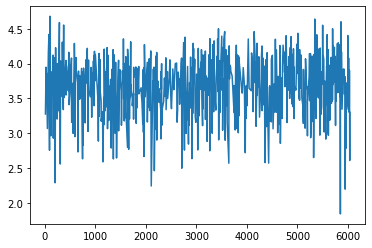

In [110]:
plt.plot(a.UserID,a.Rating)
plt.show()
